In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print("seed",seed)
print(datetime.datetime.now())

seed 3
2023-07-04 07:18:03.887032


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(1038.2644)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 48


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(5.0334)tensor(3.3782)tensor(5.6663)tensor(5.1483)tensor(5.1675)tensor(6.1962)tensor(4.1810)tensor(6.0808)tensor(6.9064)tensor(3.4146)tensor(9.8807)tensor(3.5475)tensor(5.0612)tensor(3.0632)tensor(5.1291)tensor(3.3219)tensor(6.7968)tensor(5.0792)tensor(5.1207)tensor(4.9082)tensor(6.8102)tensor(3.3505)tensor(5.0231)tensor(5.4685)tensor(7.1352)tensor(10.2511)tensor(5.5825)tensor(3.7293)tensor(3.0723)tensor(3.8097)tensor(6.6879)tensor(4.9502)tensor(7.1736)tensor(5.4502)tensor(4.6852)tensor(4.5896)tensor(6.1487)tensor(7.0357)tensor(6.7943)tensor(5.7629)tensor(5.2769)tensor(3.4104)tensor(6.4706)tensor(3.6443)tensor(5.3773)tensor(3.6780)tensor(2.7604)tensor(4.9862)tensor(7.6715)tensor(2.6843)tensor(3.0593)tensor(3.5293)tensor(7.6972)tensor(4.3362)tensor(4.1951)tensor(6.2552)tensor(3.5259)tensor(5.5037)tensor(5.6093)tensor(3.9545)tensor(3.5968)tensor(2.7875)tensor(5.0384)tensor(6.5314)tensor(2.8413)tensor(2.5733)tensor(6.8305)tensor(2.8137)tensor(10.7820)tensor(6.6624)tensor(5.2293)tens

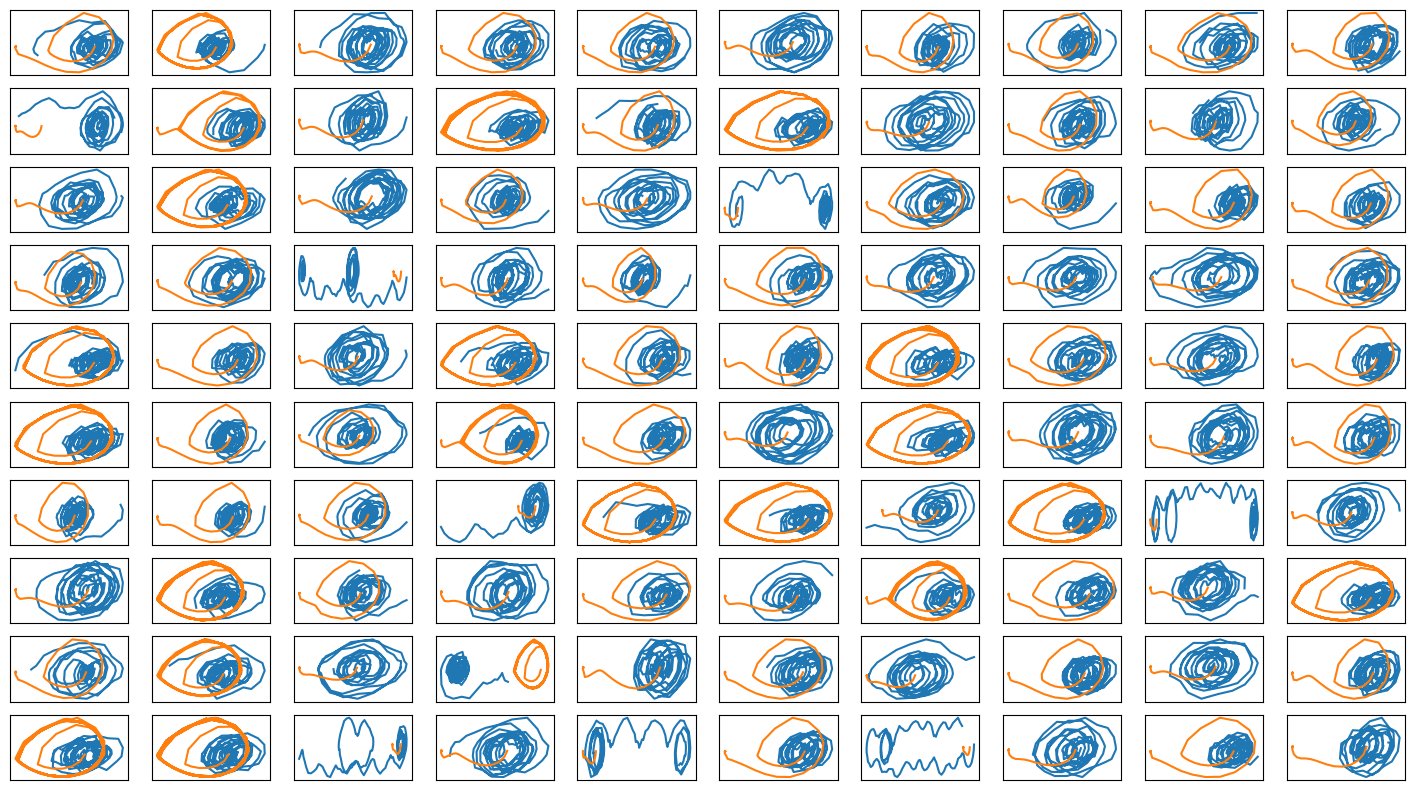

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 3768.36043  validloss 684.68602±0.00000  bestvalidloss 684.68602  last_update 0
train: iter 1  trainloss 768.88657  validloss 492.87155±0.00000  bestvalidloss 492.87155  last_update 0
train: iter 2  trainloss 666.25591  validloss 480.28373±0.00000  bestvalidloss 480.28373  last_update 0
train: iter 3  trainloss 553.35861  validloss 458.50517±0.00000  bestvalidloss 458.50517  last_update 0
train: iter 4  trainloss 486.74885  validloss 430.86942±0.00000  bestvalidloss 430.86942  last_update 0
train: iter 5  trainloss 441.41971  validloss 406.20101±0.00000  bestvalidloss 406.20101  last_update 0
train: iter 6  trainloss 415.51888  validloss 383.50533±0.00000  bestvalidloss 383.50533  last_update 0
train: iter 7  trainloss 396.99910  validloss 367.50560±0.00000  bestvalidloss 367.50560  last_update 0
train: iter 8  trainloss 378.96078  validloss 348.70514±0.00000  bestvalidloss 348.70514  last_update 0
train: iter 9  trainloss 368.63700  validlos

train: iter 78  trainloss -422.24501  validloss -537.69023±0.00000  bestvalidloss -537.69023  last_update 0
train: iter 79  trainloss -419.28681  validloss -532.98651±0.00000  bestvalidloss -537.69023  last_update 1
train: iter 80  trainloss -452.63916  validloss -548.20871±0.00000  bestvalidloss -548.20871  last_update 0
train: iter 81  trainloss -457.75894  validloss -544.89107±0.00000  bestvalidloss -548.20871  last_update 1
train: iter 82  trainloss -472.38238  validloss -582.30524±0.00000  bestvalidloss -582.30524  last_update 0
train: iter 83  trainloss -467.55632  validloss -586.91265±0.00000  bestvalidloss -586.91265  last_update 0
train: iter 84  trainloss -473.91515  validloss -607.29816±0.00000  bestvalidloss -607.29816  last_update 0
train: iter 85  trainloss -488.20592  validloss -607.39356±0.00000  bestvalidloss -607.39356  last_update 0
train: iter 86  trainloss -496.85767  validloss -550.10682±0.00000  bestvalidloss -607.39356  last_update 1
train: iter 87  trainloss -4

train: iter 155  trainloss -648.03235  validloss -721.81304±0.00000  bestvalidloss -756.01205  last_update 4
train: iter 156  trainloss -651.27315  validloss -751.91174±0.00000  bestvalidloss -756.01205  last_update 5
train: iter 157  trainloss -632.69842  validloss -718.82561±0.00000  bestvalidloss -756.01205  last_update 6
train: iter 158  trainloss -645.85025  validloss -728.04411±0.00000  bestvalidloss -756.01205  last_update 7
train: iter 159  trainloss -650.18537  validloss -746.62089±0.00000  bestvalidloss -756.01205  last_update 8
train: iter 160  trainloss -640.75102  validloss -629.74455±0.00000  bestvalidloss -756.01205  last_update 9
train: iter 161  trainloss -650.47313  validloss -765.80737±0.00000  bestvalidloss -765.80737  last_update 0
train: iter 162  trainloss -646.29818  validloss -731.89068±0.00000  bestvalidloss -765.80737  last_update 1
train: iter 163  trainloss -595.87604  validloss -646.02511±0.00000  bestvalidloss -765.80737  last_update 2
train: iter 164  tr

train: iter 231  trainloss -665.70750  validloss -728.13238±0.00000  bestvalidloss -795.59183  last_update 10
train: iter 232  trainloss -693.61276  validloss -751.75612±0.00000  bestvalidloss -795.59183  last_update 11
train: iter 233  trainloss -689.92585  validloss -776.08853±0.00000  bestvalidloss -795.59183  last_update 12
train: iter 234  trainloss -696.11375  validloss -740.96409±0.00000  bestvalidloss -795.59183  last_update 13
train: iter 235  trainloss -695.18041  validloss -755.74361±0.00000  bestvalidloss -795.59183  last_update 14
train: iter 236  trainloss -684.84418  validloss -786.95096±0.00000  bestvalidloss -795.59183  last_update 15
train: iter 237  trainloss -654.75305  validloss -760.75942±0.00000  bestvalidloss -795.59183  last_update 16
train: iter 238  trainloss -688.09616  validloss -703.74945±0.00000  bestvalidloss -795.59183  last_update 17
train: iter 239  trainloss -697.93892  validloss -796.25162±0.00000  bestvalidloss -796.25162  last_update 0
train: iter

train: iter 306  trainloss -709.49527  validloss -796.78747±0.00000  bestvalidloss -801.38393  last_update 15
train: iter 307  trainloss -691.99010  validloss -791.09560±0.00000  bestvalidloss -801.38393  last_update 16
train: iter 308  trainloss -706.43004  validloss -790.80475±0.00000  bestvalidloss -801.38393  last_update 17
train: iter 309  trainloss -700.44093  validloss -793.04943±0.00000  bestvalidloss -801.38393  last_update 18
train: iter 310  trainloss -656.84546  validloss -791.40602±0.00000  bestvalidloss -801.38393  last_update 19
train: iter 311  trainloss -706.26428  validloss -744.28649±0.00000  bestvalidloss -801.38393  last_update 20
train: iter 312  trainloss -724.69607  validloss -801.92266±0.00000  bestvalidloss -801.92266  last_update 0
train: iter 313  trainloss -696.26594  validloss -777.96165±0.00000  bestvalidloss -801.92266  last_update 1
train: iter 314  trainloss -692.66167  validloss -714.74177±0.00000  bestvalidloss -801.92266  last_update 2
train: iter 3

train: iter 382  trainloss -697.01145  validloss -811.71057±0.00000  bestvalidloss -812.86460  last_update 37
train: iter 383  trainloss -720.03760  validloss -746.36719±0.00000  bestvalidloss -812.86460  last_update 38
train: iter 384  trainloss -716.59773  validloss -804.48800±0.00000  bestvalidloss -812.86460  last_update 39
train: iter 385  trainloss -720.81657  validloss -811.89897±0.00000  bestvalidloss -812.86460  last_update 40
train: iter 386  trainloss -705.13466  validloss -788.93627±0.00000  bestvalidloss -812.86460  last_update 41
train: iter 387  trainloss -718.38881  validloss -732.23248±0.00000  bestvalidloss -812.86460  last_update 42
train: iter 388  trainloss -688.20599  validloss -792.91881±0.00000  bestvalidloss -812.86460  last_update 43
train: iter 389  trainloss -645.27631  validloss -706.27998±0.00000  bestvalidloss -812.86460  last_update 44
train: iter 390  trainloss -712.96386  validloss -705.73817±0.00000  bestvalidloss -812.86460  last_update 45
train: ite

train: iter 457  trainloss -719.37096  validloss -816.89048±0.00000  bestvalidloss -823.29818  last_update 8
train: iter 458  trainloss -707.97817  validloss -793.27025±0.00000  bestvalidloss -823.29818  last_update 9
train: iter 459  trainloss -729.14480  validloss -802.38947±0.00000  bestvalidloss -823.29818  last_update 10
train: iter 460  trainloss -718.03007  validloss -816.08904±0.00000  bestvalidloss -823.29818  last_update 11
train: iter 461  trainloss -725.11225  validloss -807.64184±0.00000  bestvalidloss -823.29818  last_update 12
train: iter 462  trainloss -704.90197  validloss -775.56816±0.00000  bestvalidloss -823.29818  last_update 13
train: iter 463  trainloss -716.29771  validloss -794.21089±0.00000  bestvalidloss -823.29818  last_update 14
train: iter 464  trainloss -726.23665  validloss -811.12076±0.00000  bestvalidloss -823.29818  last_update 15
train: iter 465  trainloss -700.45537  validloss -811.64395±0.00000  bestvalidloss -823.29818  last_update 16
train: iter 

train: iter 532  trainloss -725.58708  validloss -805.55402±0.00000  bestvalidloss -827.47728  last_update 4
train: iter 533  trainloss -727.28238  validloss -804.26568±0.00000  bestvalidloss -827.47728  last_update 5
train: iter 534  trainloss -697.87159  validloss -803.40110±0.00000  bestvalidloss -827.47728  last_update 6
train: iter 535  trainloss -719.68470  validloss -768.32061±0.00000  bestvalidloss -827.47728  last_update 7
train: iter 536  trainloss -714.65205  validloss -774.10996±0.00000  bestvalidloss -827.47728  last_update 8
train: iter 537  trainloss -727.51474  validloss -803.77828±0.00000  bestvalidloss -827.47728  last_update 9
train: iter 538  trainloss -719.20800  validloss -759.08607±0.00000  bestvalidloss -827.47728  last_update 10
train: iter 539  trainloss -702.14786  validloss -817.24828±0.00000  bestvalidloss -827.47728  last_update 11
train: iter 540  trainloss -733.37936  validloss -802.78293±0.00000  bestvalidloss -827.47728  last_update 12
train: iter 541 

train: iter 607  trainloss -736.50252  validloss -793.33789±0.00000  bestvalidloss -829.87804  last_update 56
train: iter 608  trainloss -742.69000  validloss -820.43359±0.00000  bestvalidloss -829.87804  last_update 57
train: iter 609  trainloss -740.40946  validloss -820.33457±0.00000  bestvalidloss -829.87804  last_update 58
train: iter 610  trainloss -718.18227  validloss -813.43126±0.00000  bestvalidloss -829.87804  last_update 59
train: iter 611  trainloss -705.88002  validloss -828.11548±0.00000  bestvalidloss -829.87804  last_update 60
train: iter 612  trainloss -738.94550  validloss -796.22826±0.00000  bestvalidloss -829.87804  last_update 61
train: iter 613  trainloss -737.22332  validloss -771.18339±0.00000  bestvalidloss -829.87804  last_update 62
train: iter 614  trainloss -747.46782  validloss -825.88260±0.00000  bestvalidloss -829.87804  last_update 63
train: iter 615  trainloss -722.05670  validloss -781.08121±0.00000  bestvalidloss -829.87804  last_update 64
train: ite

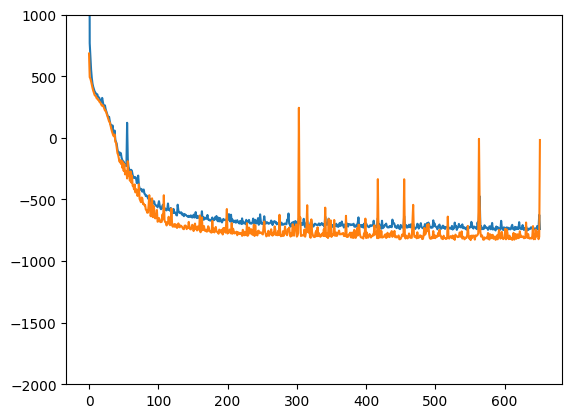

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

実環境方策rollout vs Sim環境方策rollout


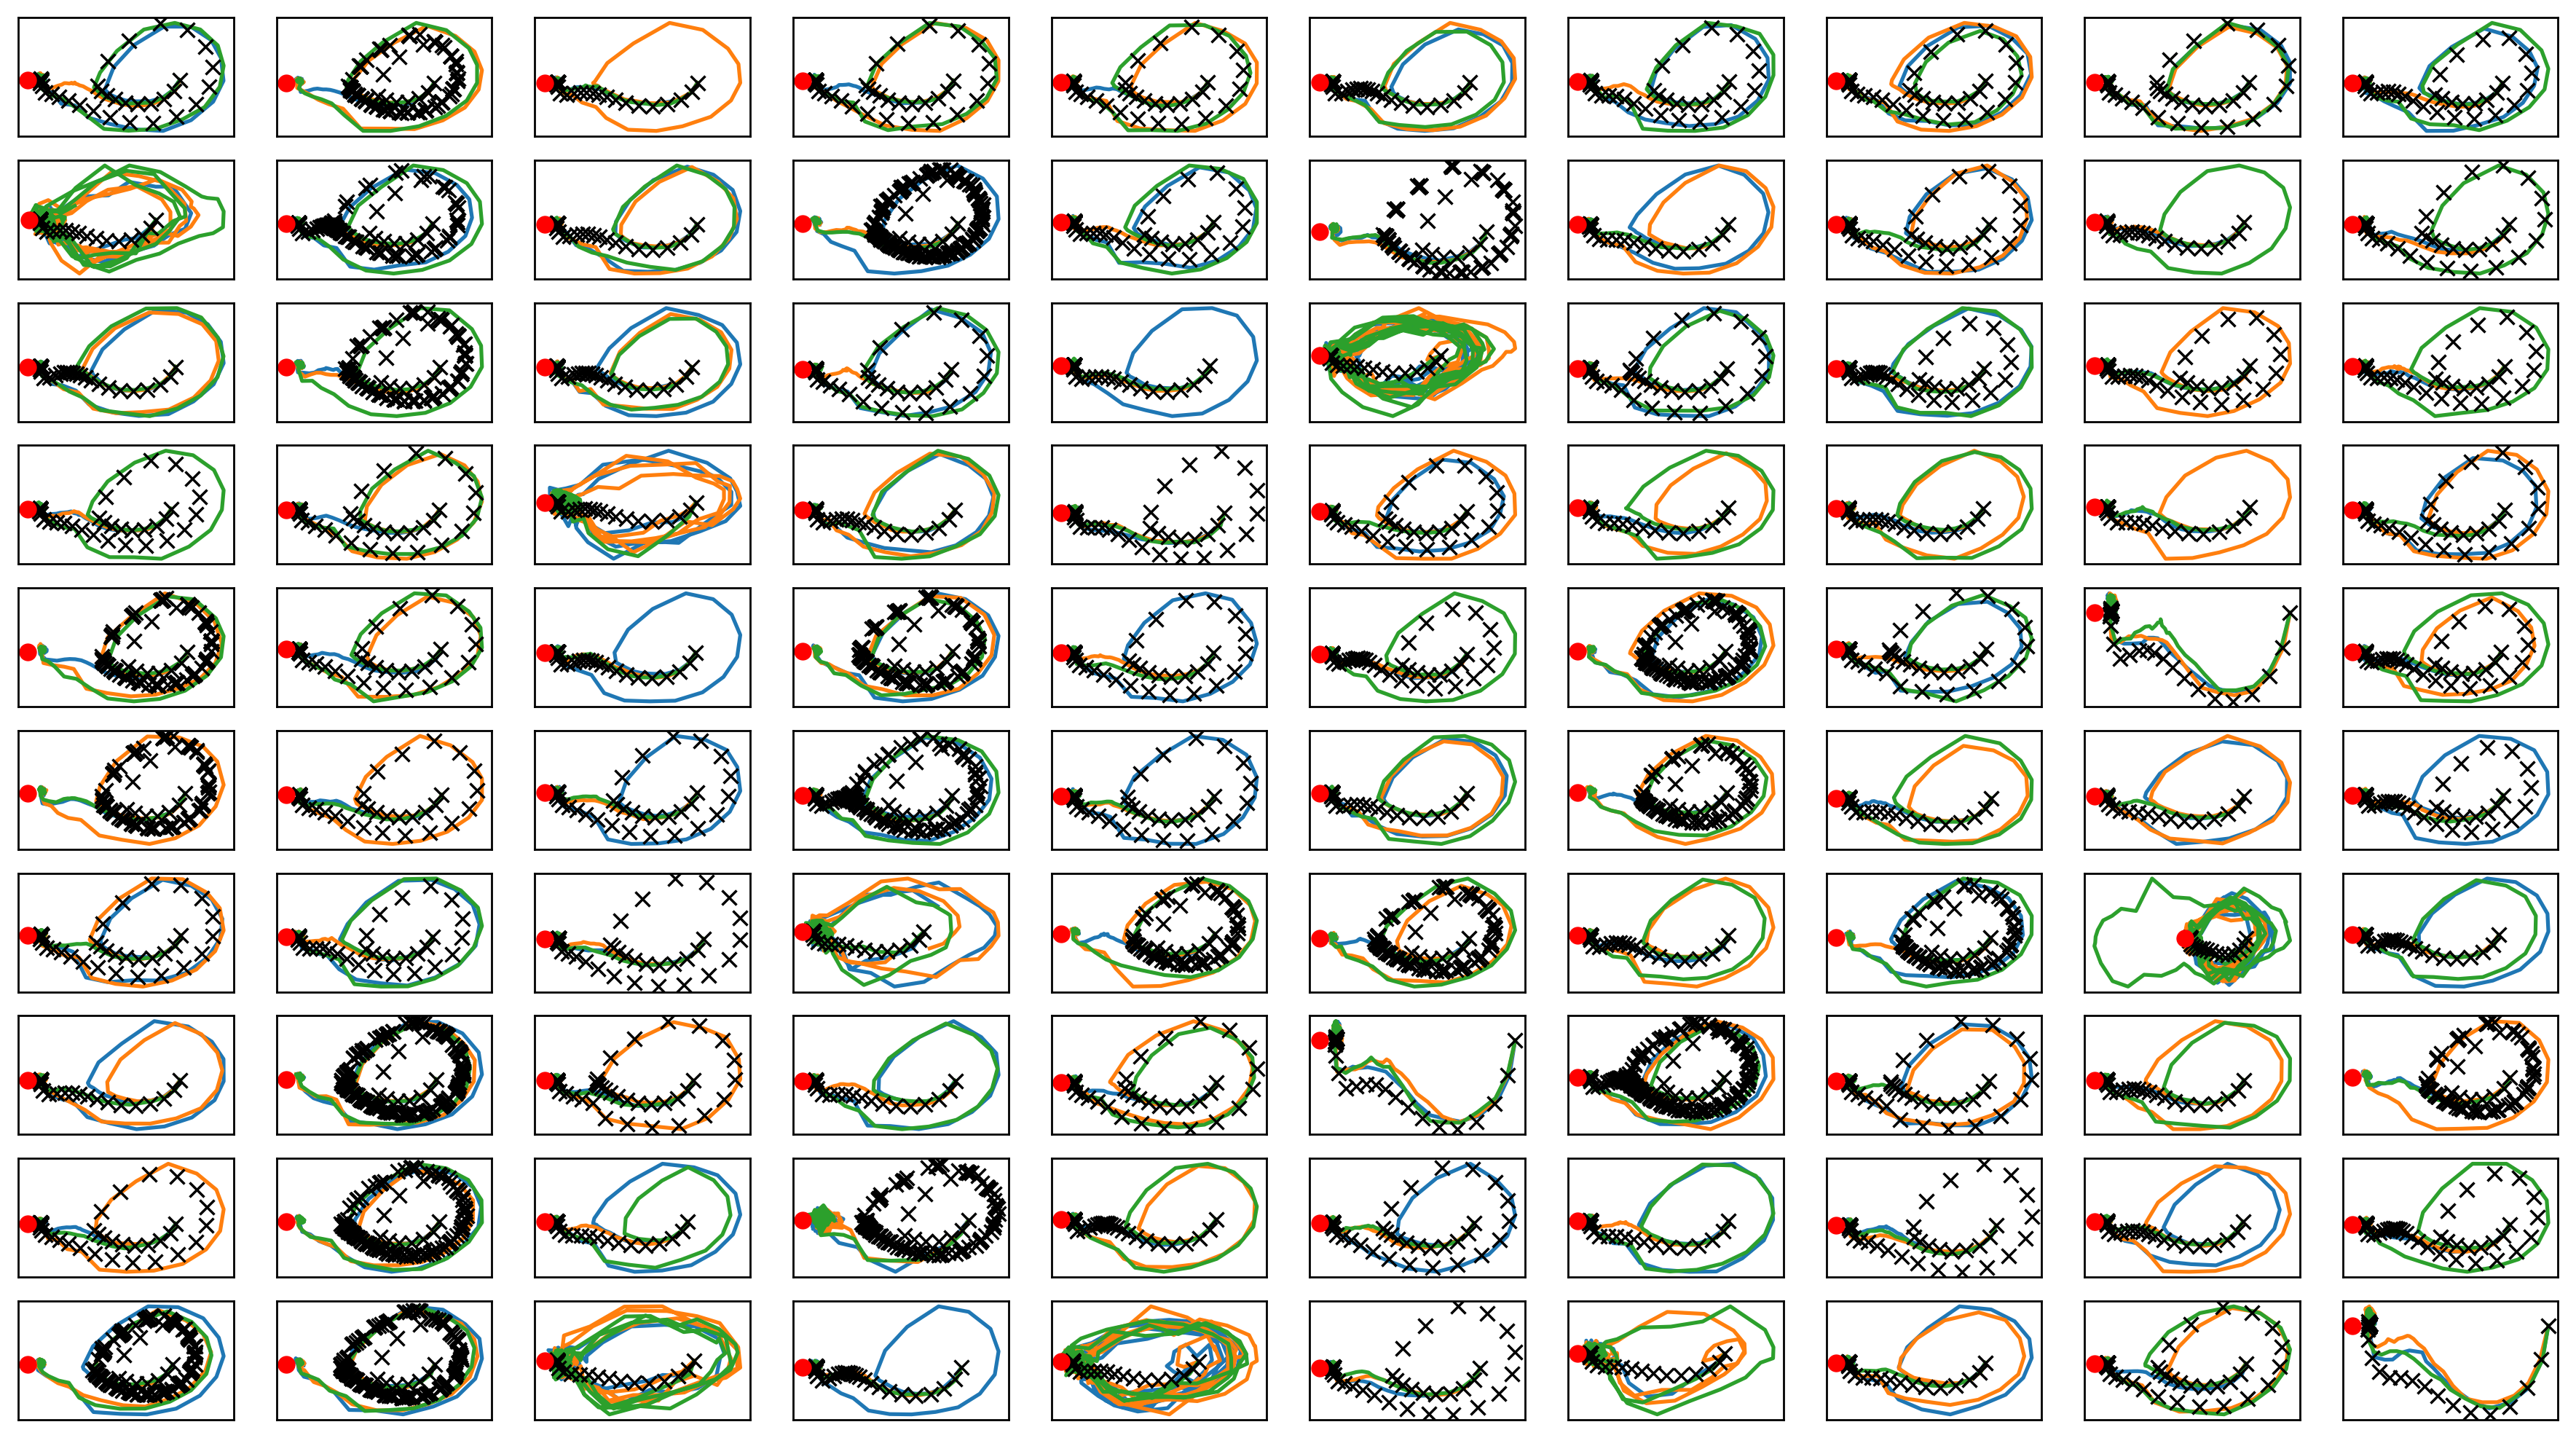

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

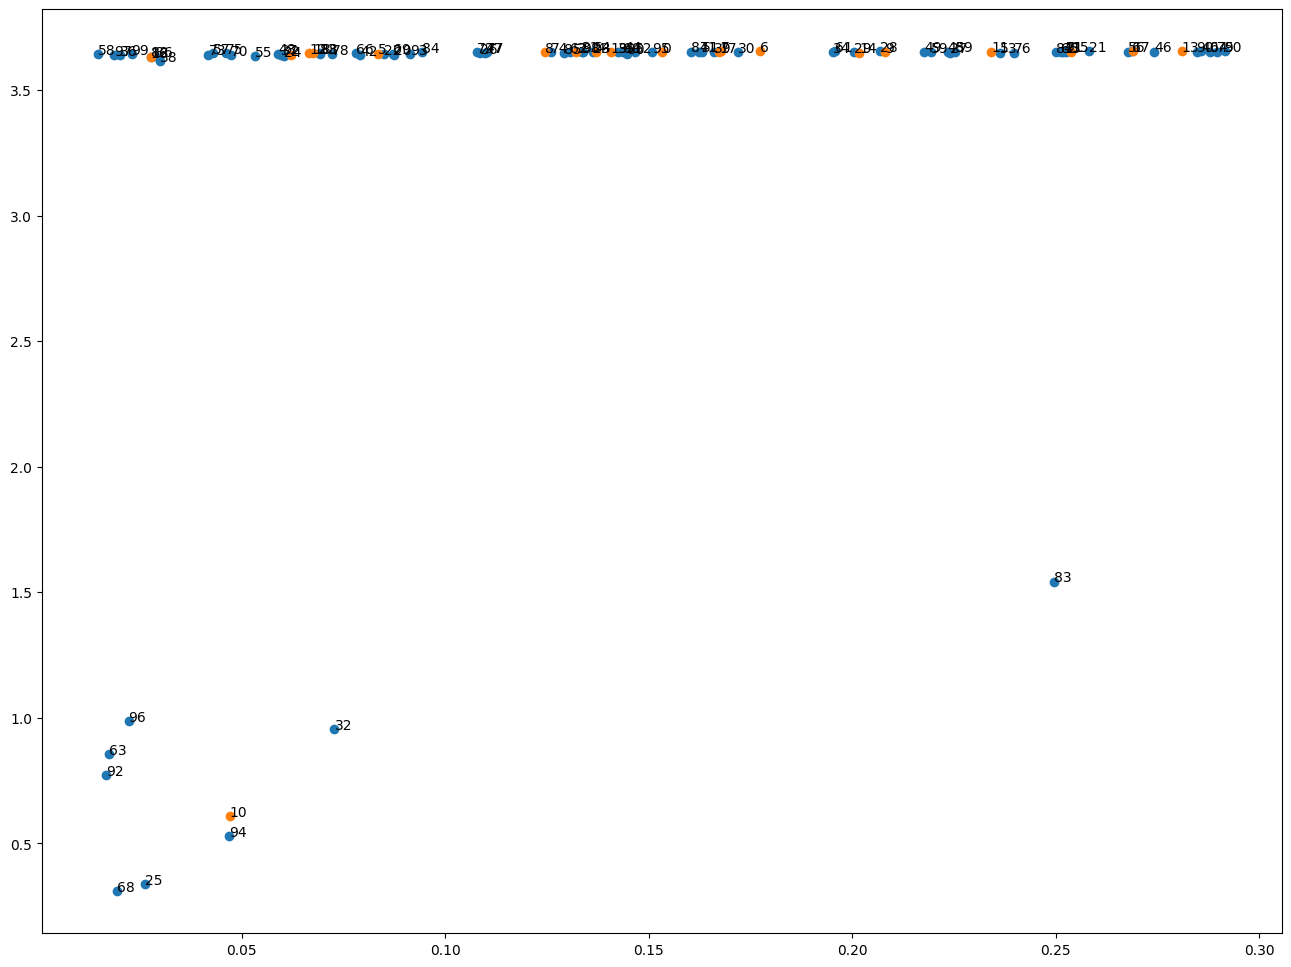

[0.15324828 0.26888793 0.06217286 0.13224295 0.13704997 0.08354618
 0.17725885 0.16765623 0.12453036 0.20794138 0.04706032 0.23409443
 0.06658737 0.28091509 0.2017151  0.25372526 0.0276651  0.16735223
 0.06751635 0.14068207 0.08753783 0.25816017 0.08504636 0.13638662
 0.06041361 0.02616881 0.10865286 0.22402387 0.20675412 0.20044044
 0.17183816 0.13354351 0.07280263 0.06917526 0.19514306 0.14252658
 0.02009083 0.05969281 0.0300313  0.16598332 0.28563037 0.1623059
 0.079166   0.25175792 0.14407199 0.2234257  0.27419258 0.10978218
 0.05891417 0.21770089 0.29162951 0.1630783  0.14666197 0.23628546
 0.13658381 0.05316401 0.26771796 0.0429997  0.01473268 0.21921244
 0.14369349 0.19566694 0.13065617 0.01731945 0.28791216 0.25123873
 0.07810352 0.2686711  0.01940196 0.08726173 0.0474101  0.25242589
 0.10773226 0.04184014 0.12587483 0.04612206 0.2396893  0.11031089
 0.0721711  0.28956844 0.14474911 0.25010637 0.02763948 0.24952833
 0.0943959  0.12924451 0.02867004 0.16042046 0.06925088 0.22530

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


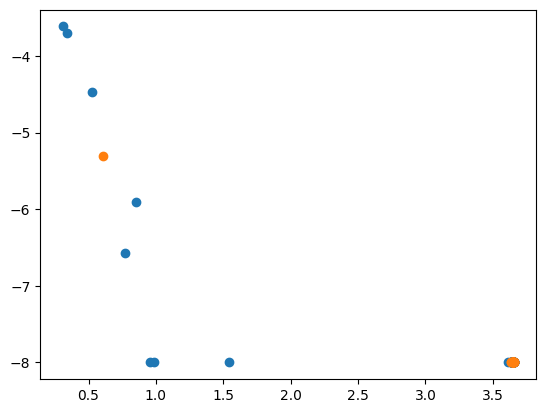

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 6.63587  validloss 7.25030±0.00000  bestvalidloss 7.25030  last_update 0
train: iter 1  trainloss 6.04022  validloss 6.59106±0.00000  bestvalidloss 6.59106  last_update 0
train: iter 2  trainloss 5.54520  validloss 6.02053±0.00000  bestvalidloss 6.02053  last_update 0
train: iter 3  trainloss 5.14345  validloss 5.55405±0.00000  bestvalidloss 5.55405  last_update 0
train: iter 4  trainloss 4.78084  validloss 5.13112±0.00000  bestvalidloss 5.13112  last_update 0
train: iter 5  trainloss 4.46742  validloss 4.79928±0.00000  bestvalidloss 4.79928  last_update 0
train: iter 6  trainloss 4.20982  validloss 4.51426±0.00000  bestvalidloss 4.51426  last_update 0
train: iter 7  trainloss 3.97066  validloss 4.24767±0.00000  bestvalidloss 4.24767  last_update 0
train: iter 8  trainloss 3.76376  validloss 4.01005±0.00000  bestvalidloss 4.01005  last_update 0
train: iter 9  trainloss 3.58144  validloss 3.80717±0.00000  bestvalidloss 3.80717  last_update 0
train: iter 10  trai

train: iter 85  trainloss 1.28884  validloss 1.14488±0.00000  bestvalidloss 1.14419  last_update 2
train: iter 86  trainloss 1.28596  validloss 1.14784±0.00000  bestvalidloss 1.14419  last_update 3
train: iter 87  trainloss 1.29192  validloss 1.13560±0.00000  bestvalidloss 1.13560  last_update 0
train: iter 88  trainloss 1.30262  validloss 1.13281±0.00000  bestvalidloss 1.13281  last_update 0
train: iter 89  trainloss 1.28507  validloss 1.13763±0.00000  bestvalidloss 1.13281  last_update 1
train: iter 90  trainloss 1.30626  validloss 1.14435±0.00000  bestvalidloss 1.13281  last_update 2
train: iter 91  trainloss 1.28233  validloss 1.14746±0.00000  bestvalidloss 1.13281  last_update 3
train: iter 92  trainloss 1.26715  validloss 1.13220±0.00000  bestvalidloss 1.13220  last_update 0
train: iter 93  trainloss 1.29300  validloss 1.11993±0.00000  bestvalidloss 1.11993  last_update 0
train: iter 94  trainloss 1.28747  validloss 1.10652±0.00000  bestvalidloss 1.10652  last_update 0
train: ite

train: iter 170  trainloss 1.28322  validloss 1.08422±0.00000  bestvalidloss 1.05915  last_update 13
train: iter 171  trainloss 1.29782  validloss 1.06884±0.00000  bestvalidloss 1.05915  last_update 14
train: iter 172  trainloss 1.28448  validloss 1.07105±0.00000  bestvalidloss 1.05915  last_update 15
train: iter 173  trainloss 1.28694  validloss 1.07066±0.00000  bestvalidloss 1.05915  last_update 16
train: iter 174  trainloss 1.28545  validloss 1.07869±0.00000  bestvalidloss 1.05915  last_update 17
train: iter 175  trainloss 1.28603  validloss 1.10182±0.00000  bestvalidloss 1.05915  last_update 18
train: iter 176  trainloss 1.27318  validloss 1.08386±0.00000  bestvalidloss 1.05915  last_update 19
train: iter 177  trainloss 1.31013  validloss 1.08180±0.00000  bestvalidloss 1.05915  last_update 20
train: iter 178  trainloss 1.27718  validloss 1.09665±0.00000  bestvalidloss 1.05915  last_update 21
train: iter 179  trainloss 1.26972  validloss 1.09297±0.00000  bestvalidloss 1.05915  last_

train: iter 258  trainloss 1.28837  validloss 1.06911±0.00000  bestvalidloss 1.05265  last_update 52
train: iter 259  trainloss 1.26464  validloss 1.04875±0.00000  bestvalidloss 1.04875  last_update 0
train: iter 260  trainloss 1.25239  validloss 1.06110±0.00000  bestvalidloss 1.04875  last_update 1
train: iter 261  trainloss 1.29050  validloss 1.08453±0.00000  bestvalidloss 1.04875  last_update 2
train: iter 262  trainloss 1.30594  validloss 1.09036±0.00000  bestvalidloss 1.04875  last_update 3
train: iter 263  trainloss 1.28096  validloss 1.08191±0.00000  bestvalidloss 1.04875  last_update 4
train: iter 264  trainloss 1.27208  validloss 1.06968±0.00000  bestvalidloss 1.04875  last_update 5
train: iter 265  trainloss 1.29963  validloss 1.08632±0.00000  bestvalidloss 1.04875  last_update 6
train: iter 266  trainloss 1.28399  validloss 1.10622±0.00000  bestvalidloss 1.04875  last_update 7
train: iter 267  trainloss 1.29640  validloss 1.08891±0.00000  bestvalidloss 1.04875  last_update 8

train: iter 345  trainloss 1.28559  validloss 1.10491±0.00000  bestvalidloss 1.04875  last_update 86
train: iter 346  trainloss 1.27621  validloss 1.06304±0.00000  bestvalidloss 1.04875  last_update 87
train: iter 347  trainloss 1.28515  validloss 1.08810±0.00000  bestvalidloss 1.04875  last_update 88
train: iter 348  trainloss 1.28588  validloss 1.07068±0.00000  bestvalidloss 1.04875  last_update 89
train: iter 349  trainloss 1.26294  validloss 1.07073±0.00000  bestvalidloss 1.04875  last_update 90
train: iter 350  trainloss 1.29139  validloss 1.08684±0.00000  bestvalidloss 1.04875  last_update 91
train: iter 351  trainloss 1.25266  validloss 1.07356±0.00000  bestvalidloss 1.04875  last_update 92
train: iter 352  trainloss 1.26865  validloss 1.08872±0.00000  bestvalidloss 1.04875  last_update 93
train: iter 353  trainloss 1.25331  validloss 1.05659±0.00000  bestvalidloss 1.04875  last_update 94
train: iter 354  trainloss 1.27150  validloss 1.08611±0.00000  bestvalidloss 1.04875  last_

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([ 3.3603, -0.2807], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 12.71266  validloss 18.09269±0.00000  bestvalidloss 18.09269  last_update 0
train: iter 1  trainloss 6.34823  validloss 9.66877±0.00000  bestvalidloss 9.66877  last_update 0
train: iter 2  trainloss 3.65271  validloss 4.73857±0.00000  bestvalidloss 4.73857  last_update 0
train: iter 3  trainloss 2.67817  validloss 2.95183±0.00000  bestvalidloss 2.95183  last_update 0
train: iter 4  trainloss 2.24526  validloss 2.05729±0.00000  bestvalidloss 2.05729  last_update 0
train: iter 5  trainloss 2.06273  validloss 1.70982±0.00000  bestvalidloss 1.70982  last_update 0
train: iter 6  trainloss 1.88873  validloss 1.56061±0.00000  bestvalidloss 1.56061  last_update 0
train: iter 7  trainloss 1.71397  validloss 1.31653±0.00000  bestvalidloss 1.31653  last_update 0
train: iter 8  trainloss 1.56351  validloss 1.21896±0.00000  bestvalidloss 1.21896  last_update 0
train: iter 9  trainloss 1.41594  validloss 1.12665±0.00000  bestvalidloss 1.12665  last_update 0
train: iter 10  t

train: iter 83  trainloss 1.13848  validloss 0.81439±0.00000  bestvalidloss 0.75607  last_update 16
train: iter 84  trainloss 1.15902  validloss 0.86427±0.00000  bestvalidloss 0.75607  last_update 17
train: iter 85  trainloss 1.12640  validloss 0.91226±0.00000  bestvalidloss 0.75607  last_update 18
train: iter 86  trainloss 1.15786  validloss 0.80212±0.00000  bestvalidloss 0.75607  last_update 19
train: iter 87  trainloss 1.15050  validloss 0.83195±0.00000  bestvalidloss 0.75607  last_update 20
train: iter 88  trainloss 1.15538  validloss 0.77763±0.00000  bestvalidloss 0.75607  last_update 21
train: iter 89  trainloss 1.15775  validloss 0.77258±0.00000  bestvalidloss 0.75607  last_update 22
train: iter 90  trainloss 1.15834  validloss 0.80584±0.00000  bestvalidloss 0.75607  last_update 23
train: iter 91  trainloss 1.13095  validloss 0.89703±0.00000  bestvalidloss 0.75607  last_update 24
train: iter 92  trainloss 1.16908  validloss 0.82675±0.00000  bestvalidloss 0.75607  last_update 25


train: iter 165  trainloss 1.13686  validloss 0.91418±0.00000  bestvalidloss 0.75607  last_update 98
train: iter 166  trainloss 1.14641  validloss 0.85826±0.00000  bestvalidloss 0.75607  last_update 99
train: iter 167  trainloss 1.16420  validloss 0.86425±0.00000  bestvalidloss 0.75607  last_update 100
train: fin


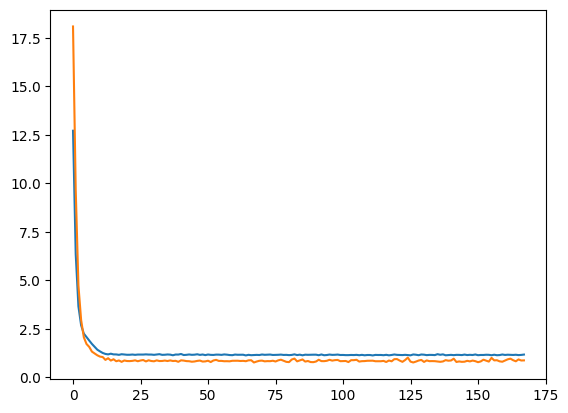

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(3.0796)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(-0.5173)


In [21]:
print(vi.h_min_tilde)

-5.46187


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-0.3965657573412474
tensor([0.6080])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

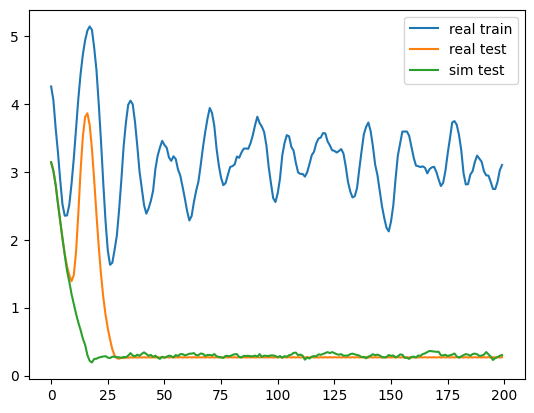

encoder [ 3.650494 -8.      ]
initial_belief tensor([ 3.3603, -0.2807])
real train tensor([ 3.6429, -8.0064])
real test tensor([ 1.0060, -7.9817])
sim tensor([ 3.6229, -7.9904])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-1.0


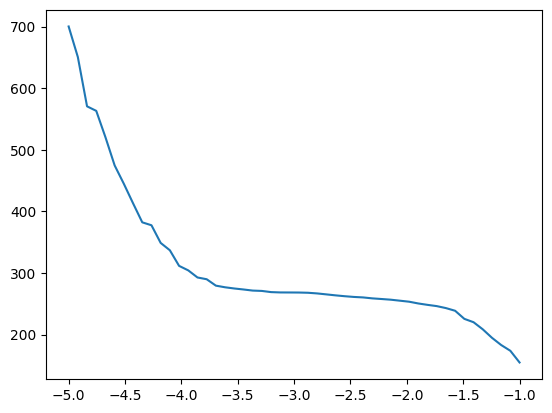

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

1.464959454555555
tensor([-0.0674])
